Importing libraries

In [3]:
import pandas as pd
import numpy as py
import seaborn as sea
import matplotlib.pyplot as plot


Importing the data file

In [4]:
c = pd.read_csv(r'C:/Users/Oz/Desktop/Projects/Unicorn_Companies.csv')


Looking at what the data looks like

In [5]:
c.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0


dropping duplicates if there are any

In [7]:
c.drop_duplicates().shape

(1037, 13)

Sorting the companies by their valuations in descending order

In [10]:
c.sort_values(by='Valuation ($B)',ascending=False).head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
58,OYO Rooms,$9.6,9/25/2018,India,Gurugram,Travel,"SoftBank Group, Sequoia Capital India,Lightspe...",2012.0,$3.114B,NaN,20.0,11.0,NaN
50,ServiceTitan,$9.5,11/14/2018,United States,Glendale,Internet software & services,"Bessemer Venture Partners, ICONIQ Capital, Bat...",2012.0,$1.099B,NaN,16.0,6.0,NaN
49,OutSystems,$9.5,6/5/2018,United States,Boston,Internet software & services,"KKR, ES Ventures, North Bridge Growth Equity",2001.0,$572.01M,NaN,13.0,3.0,NaN
51,HEYTEA,$9.28,7/1/2019,China,Shenzhen,Other,"Sequoia Capital China, Tencent Investment, BA ...",2012.0,$579.23M,NaN,13.0,3.0,NaN


Counting the companies based on the year they are founded

In [11]:
c["Founded Year"].value_counts()

Founded Year
2015.0    144
2014.0    105
2016.0    101
2012.0     87
2013.0     85
2011.0     76
2017.0     67
2018.0     55
2010.0     37
2019.0     34
2009.0     33
2007.0     23
2020.0     23
2008.0     23
2005.0     15
2006.0     13
2000.0     12
1999.0      8
2004.0      8
2001.0      8
2021.0      8
2003.0      7
1998.0      4
2002.0      3
1994.0      2
1995.0      2
1992.0      2
1991.0      1
1996.0      1
1919.0      1
1973.0      1
1979.0      1
1984.0      1
1990.0      1
1997.0      1
1993.0      1
Name: count, dtype: int64

Creating a histogram for the Founded Year

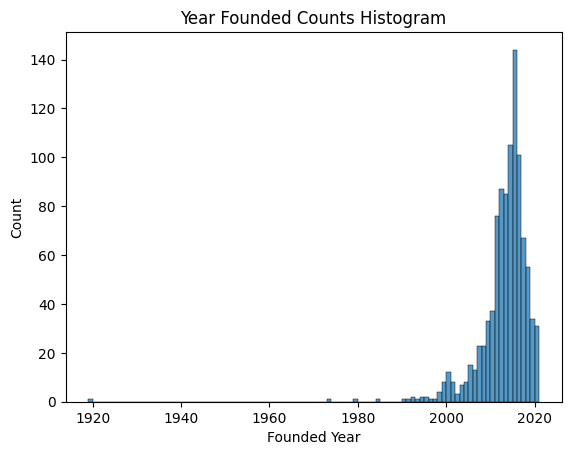

In [14]:
sea.histplot(data=c,x='Founded Year')
plot.title('Year Founded Counts Histogram');

Converting date joined to date time, this will show the date as yyyy-mm-dd

In [15]:
c["Date Joined"] = pd.to_datetime(c["Date Joined"])

Creating a new colum here to add their month of joining to the unicorn club (Unicorn = 1B dollar valuation)

In [ ]:
c["Month Joined"] = c["Date Joined"].dt.month_name()

Lets look at how many years it took for them to actually be a unicorn company. Subtracting the date joined from the year they were founded.


In [18]:
c["Years To Join"] = c["Date Joined"].dt.year - c["Founded Year"]
c.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Years To Join
0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0,5.0
1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN,10.0
2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0,4.0
3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0,6.0
4,Epic Games,$42,2018-10-26,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0,27.0


Lets dig deeper into a specific year, like 2022.

In [20]:

companies_2022 = c[c["Date Joined"].dt.year == 2022]

In [21]:
companies_2022.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits,Years To Join
16,Miro,$17.5,2022-01-05,United States,San Francisco,Internet software & services,"Accel, AltaIR Capital, Technology Crossover Ve...",2011.0,$475M,NaN,18.0,1.0,NaN,11.0
114,RELEX Solutions,$5.7,2022-02-17,Finland,Helsinki,"Supply chain, logistics, & delivery","Blackstone, Technology Crossover Ventures, Sum...",2005.0,$792.36M,NaN,4.0,1.0,NaN,17.0
139,Qonto,$5,2022-01-11,France,Paris,Fintech,"Alven Capital, Valar Ventures, Tencent Holdings",2016.0,$703.39M,NaN,17.0,3.0,NaN,6.0
168,Globalization Partners,$4.2,2022-01-24,United States,Boston,Internet software & services,"Vista Equity Partners, Wincove, TDR Capital",2012.0,$353.5M,NaN,5.0,1.0,NaN,10.0
251,Ironclad,$3.2,2022-01-18,United States,Sacramento,Internet software & services,"Accel, Sequoia Capital, Y Combinator",2014.0,$331.12M,NaN,10.0,3.0,NaN,8.0


Lets visualize the time it took for this companies to become unicorns

C:\Users\Oz\AppData\Local\Temp\ipykernel_12280\3308689135.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sea.barplot(x=c["Founded Year"], y=c["Years To Join"], ci=False)


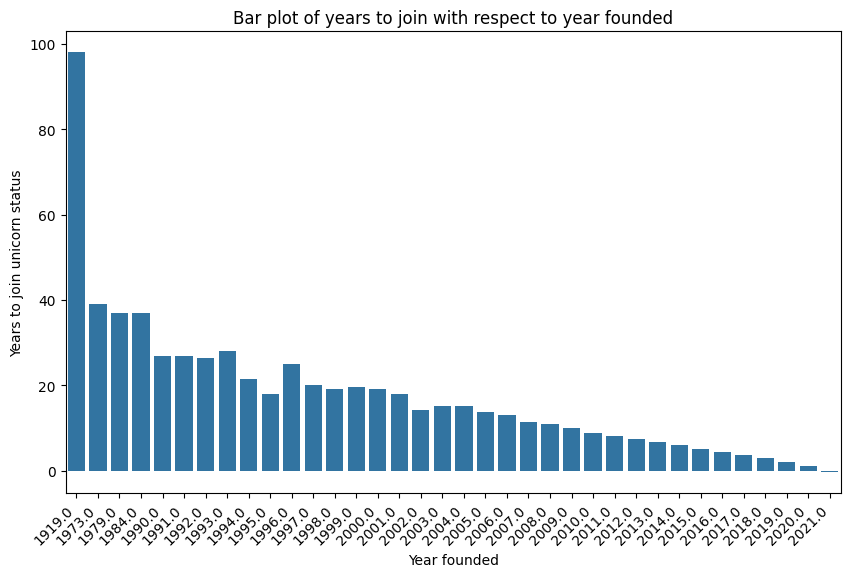

In [26]:
plot.figure(figsize=(10,6))
sea.barplot(x=c["Founded Year"], y=c["Years To Join"], ci=False)
plot.title("Bar plot of years to join with respect to year founded")
plot.xlabel("Year founded")
plot.ylabel("Years to join unicorn status")
plot.xticks(rotation=45, horizontalalignment='right')
plot.show()